# HW 2 Machine Learning

## Ex1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
m = pd.read_csv('/Users/alex/Desktop/Columbia/Courses/ML for FE and OR/HW 2 ML/Smarket.csv')

In [4]:
m.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [5]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1250 non-null   int64  
 1   Year        1250 non-null   int64  
 2   Lag1        1250 non-null   float64
 3   Lag2        1250 non-null   float64
 4   Lag3        1250 non-null   float64
 5   Lag4        1250 non-null   float64
 6   Lag5        1250 non-null   float64
 7   Volume      1250 non-null   float64
 8   Today       1250 non-null   float64
 9   Direction   1250 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 97.8+ KB


In [7]:
m.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,625.500000,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,360.988227,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,1.000000,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,313.250000,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,625.500000,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,937.750000,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,1250.000000,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


### Logistic Regression

In [6]:
m.corr()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Unnamed: 0,1.000000,0.979773,0.035415,0.036022,0.038989,0.041437,0.035025,0.546348,0.035273
Year,0.979773,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.035415,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.036022,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.038989,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.041437,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.035025,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.546348,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.035273,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
X = m.drop(['Direction', 'Unnamed: 0', 'Year', 'Today'], axis = 1)
Y = pd.get_dummies(m)['Direction_Up']

In [54]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, Y)

In [56]:
features = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
pd.DataFrame(model.coef_, columns = features)

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,-0.07279,-0.042291,0.010958,0.009218,0.01023,0.127939


In [57]:
pd.DataFrame(model.intercept_, )

,0
0,-0.11455


Sklearn does not offer the possibility to see the detailed results

Let us do some predictions!

In [61]:
model.predict_proba(X[0:10])

array([[0.49224404, 0.50775596],
       [0.51791235, 0.48208765],
       [0.51852092, 0.48147908],
       [0.48438969, 0.51561031],
       [0.48865013, 0.51134987],
       [0.49273069, 0.50726931],
       [0.50711612, 0.49288388],
       [0.49058882, 0.50941118],
       [0.48177107, 0.51822893],
       [0.51055965, 0.48944035]])

These are the predictions probabilities made by the model for the 10 first days

In [64]:
pred = model.predict(X)
pred[0:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=uint8)

We can see that the prediction is to the highest probability label

In [65]:
model.score(X,Y)

0.5248

This lets us know what is the amount of correct prediction : it is more than 0.5 !

In [68]:
df_confusion = pd.crosstab(Y, pred)
df_confusion = pd.crosstab(Y, pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)

Predicted,0,1,All
Actual,,,
0,143,459,602
1,135,513,648
All,278,972,1250


Recall that 0 is for down and 1 for up.

We are better than random guessing... but on the training dataset!!

In [72]:
X_train = X[m.Year < 2005]
X_test = X[m.Year == 2005]

Y_train = Y[m.Year < 2005]
Y_test = Y[m.Year == 2005]

In [73]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, Y_train)

In [74]:
features = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
pd.DataFrame(model.coef_, columns = features)

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume
0,-0.054239,-0.045425,0.007458,0.00676,-0.004055,-0.097695


Let us see how we perform on the train test

In [82]:
model.score(X_test,Y_test)

0.4880952380952381

We better trade radomly...
#### Let us just keep the best p-value variables.

In [86]:
X = m[['Lag1', 'Lag2']]

X_train = X[m.Year < 2005]
X_test = X[m.Year == 2005]

In [87]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, Y_train)

In [88]:
features = ['Lag1', 'Lag2']
pd.DataFrame(model.coef_, columns = features)

,Lag1,Lag2
0,-0.05547,-0.044365


In [89]:
model.score(X_test,Y_test)

0.5595238095238095

Hey !! Looks like we make some money here...

In [100]:
y_pred = model.predict(X_test)

df_confusion = pd.crosstab(Y_test, y_pred)
df_confusion = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)

## We can go a bit faster this way but it is not displayed in a very cool way
confusion_matrix(Y_test, y_pred)

Predicted,0,1,All
Actual,,,
0,35,76,111
1,35,106,141
All,70,182,252


array([[ 35,  76],
       [ 35, 106]])

In [96]:
print('if we buy when predicted UP, we are right approximately {} % of the time!!'.format(round(100*106/182,3)))

if we buy when predicted UP, we are right approximately 58.242 % of the time!!


### LDA

In [154]:
X = m[['Lag1', 'Lag2']]
Y = pd.get_dummies(m)['Direction_Up']

X_train = X[m.Year < 2005]
X_test = X[m.Year == 2005]

Y_train = Y[m.Year < 2005]
Y_test = Y[m.Year == 2005]

In [155]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [156]:
model2 = LDA(solver = 'svd').fit(X_train,Y_train)

In [157]:
y_pred = model2.predict(X_test)
confusion_matrix(Y_test, y_pred)

array([[ 35,  76],
       [ 35, 106]])

In [158]:
model2.coef_

array([[-0.05544078, -0.0443452 ]])

In [159]:
model2.score(X_test,Y_test)

0.5595238095238095

The prediction error is very identical to the previous ones

Let us now predict only with a certain probability threshold

In [168]:
P = model2.predict_proba(X_test)

print('With this model we can predict with a 50% barier an up trend {} times'.format(np.sum(model2.predict(X_test))))

r = 0

for p in P:
    if p[1]>0.9:
        r+= 1
print('With this model we can predict with a 90% barier an up trend {} times'.format(r))

With this model we can predict with a 50% barier an up trend 182 times
With this model we can predict with a 90% barier an up trend 0 times


## QDA

In [169]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [171]:
model3 = QDA().fit(X_train,Y_train)

In [172]:
y_pred = model3.predict(X_test)
confusion_matrix(Y_test, y_pred)

array([[ 30,  81],
       [ 20, 121]])

In [173]:
model3.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [175]:
model3.priors_

array([0.49198397, 0.50801603])

The priors are pretty equilibrated

In [177]:
model3.score(X_test, Y_test)

0.5992063492063492

Looks like we have a better result here!! This shows that the Stock Market data has inside itself some quadratic form that cannot be captured by linear models.

## KNN

In [180]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [181]:
model4 = KNN().fit(X_train,Y_train)

In [182]:
model4.score(X_test, Y_test)

0.48412698412698413

In [184]:
y_pred = model4.predict(X_test)
confusion_matrix(Y_test, y_pred)

array([[40, 71],
       [59, 82]])

KNN performs poorly compared to QDA

## Caravan Data set

In [186]:
c = pd.read_csv('/Users/alex/Desktop/Columbia/Courses/ML for FE and OR/HW 2 ML/Caravan.csv')

In [189]:
c.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


In [190]:
c.describe()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,2911.500000,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,...,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,1680.810965,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,...,0.377569,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1456.250000,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2911.500000,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4366.750000,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5822.000000,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,...,8.000000,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000


Let us standardize the features

In [203]:
Y = c['Purchase']
X = c.drop(['Purchase', 'Unnamed: 0'], axis = 1)
X.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0


In [207]:

for col in X.columns:
    X[col] = (X[col] - X[col].mean()) / X[col].std()

X.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,0.680848,-0.272557,0.406662,-1.216859,0.779338,-0.694251,0.217425,-0.068705,-0.161802,0.427633,...,-0.202892,-0.073159,-0.081048,-0.059915,0.764905,-0.022704,-0.073644,-0.150608,-0.08734,-0.118806
1,0.992212,-0.272557,-0.859426,-1.216859,0.779338,0.302526,-0.365379,-0.068705,0.464119,-0.096069,...,-0.202892,-0.073159,-0.081048,-0.059915,0.764905,-0.022704,-0.073644,-0.150608,-0.08734,-0.118806
2,0.992212,-0.272557,-0.859426,-1.216859,0.779338,-0.694251,-0.365379,0.914094,0.464119,-1.667175,...,-0.202892,-0.073159,-0.081048,-0.059915,0.764905,-0.022704,-0.073644,-0.150608,-0.08734,-0.118806
3,-1.187335,-0.272557,0.406662,0.010754,-0.970896,1.299302,-0.948183,0.914094,0.464119,-0.619771,...,-0.202892,-0.073159,-0.081048,-0.059915,0.764905,-0.022704,-0.073644,-0.150608,-0.08734,-0.118806
4,1.225735,-0.272557,1.672750,-1.216859,1.479432,0.302526,-0.365379,-0.068705,0.464119,0.427633,...,-0.202892,-0.073159,-0.081048,-0.059915,0.764905,-0.022704,-0.073644,-0.150608,-0.08734,-0.118806


We now have a standardized dataset.

In [214]:
X_test = X[0:1000]
X_train = X[1000:-1]

Y_test = Y[0:1000]
Y_train = Y[1000:-1]

In [217]:
model5 = KNN(n_neighbors=1).fit(X_train,Y_train)

In [218]:
model5.score(X_test, Y_test)

0.882

The error is about 12%. But only 6% of the person in the dataset buy insurances... So always predicting no is better here... is that really true ?

In [219]:
y_pred = model5.predict(X_test)
confusion_matrix(Y_test, y_pred)

array([[873,  68],
       [ 50,   9]])

In [225]:
print('No because the amount of buyers amound the predicted buyers is {}%, which is still better than 6%'.format(round(100*9/(68+9),3)))

No because the amount of buyers amound the predicted buyers is 11.688%, which is still better than 6%


In [221]:
model6 = KNN(n_neighbors=3).fit(X_train,Y_train)

In [232]:
model6.score(X_test, Y_test)

0.926

In [223]:
y_pred = model5.predict(X_test)
confusion_matrix(Y_test, y_pred)

array([[921,  20],
       [ 54,   5]])

Even better here! with a rate of 27% !

What about a logistic regression ?

In [229]:
logreg = LogisticRegression() 
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

# Evaluate accuracy
df_confusion = pd.crosstab(Y_test, y_pred)
df_confusion = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted,No,Yes,All
Actual,,,
No,934,7,941
Yes,59,0,59
All,993,7,1000


Very poor performance... we need to chance the decision probability, let us reduce it to 0.25

### Conclusion

QDA best captures the market trend

## Ex 2

In [243]:
week = pd.read_csv('/Users/alex/Desktop/Columbia/Courses/ML for FE and OR/HW 2 ML/Weekly.csv')

In [244]:
week.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [245]:
week.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [246]:
week.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


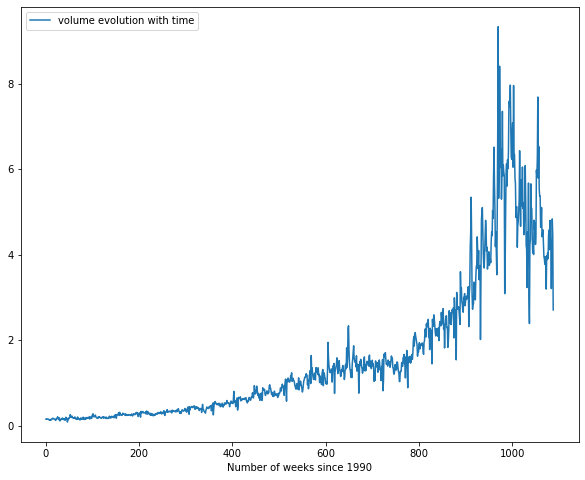

In [251]:
plt.figure(figsize = (10,8))
plt.plot([i for i in range(len(week))],week['Volume'], label = 'volume evolution with time')
plt.xlabel('Number of weeks since 1990')
plt.legend()

We can see that there is an increase in volume with years

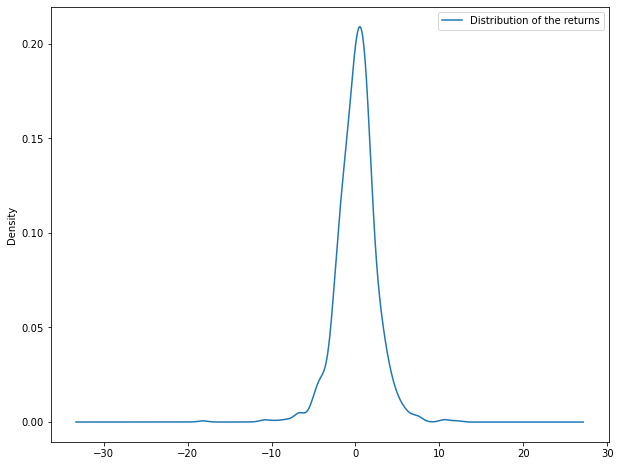

In [258]:
plt.figure(figsize = (10,8))
week['Today'].plot.kde(label = 'Distribution of the returns')
plt.legend()

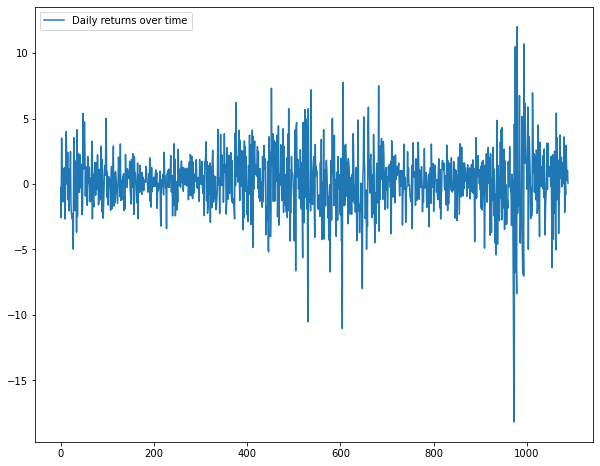

In [264]:
week['Today'].plot(label = 'Daily returns over time', figsize = (10,8))
plt.legend()

It seems that the volatility has increased in the middle of the data set and in the end of it. This can bee seen on the Volume plot too for the extreme peak at the end

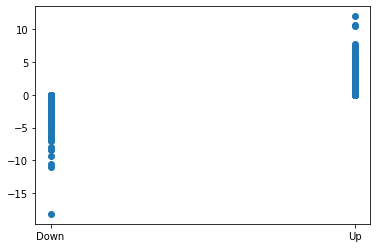

In [274]:
plt.scatter(week['Direction'], week['Today'])

We can see that there is one extreme down event, and a few extreme up event.

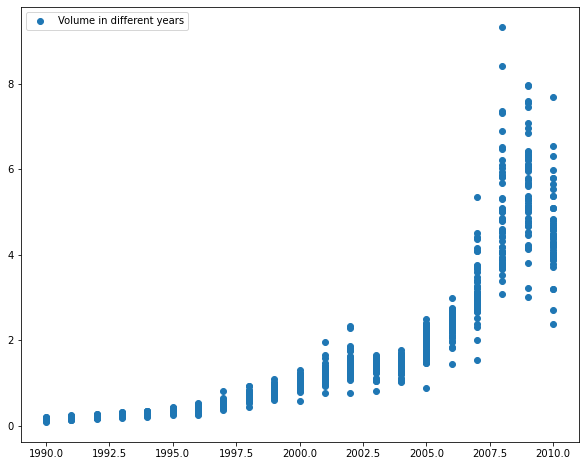

In [278]:
plt.figure(figsize = (10,8))
plt.scatter(week['Year'], week['Volume'], label = 'Volume in different years')
plt.legend()

The Volume and the Year are highly correlated.

In [282]:
import statsmodels.formula.api as smf

model = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume' 
smarket_glm = smf.glm(model, data=week, family=sm.families.Binomial()).fit() 
smarket_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Fri, 14 Oct 2022   Deviance:                       1486.4
Time:                                          20:40:11   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2669      0.086     -3.106      0.002      -0.435      -0.098
Lag1           0.0413      0.026      1.563      0.118      -0.010       0.093
Lag2          -0.0584      0.027     -2.175      0.030      -0.111      -0.006
Lag3           0.0161      0.027      0.602      0.547      -0.036       0.068
Lag4           0.0278      0.026      1.050      0.294      -0.024       0.080
Lag5           0.0145      0.026      0.549      0.583      -0.037       0.066
Volume         0.0227      0.037      0.616      0.538      -0.050       0.095
==============================================================================
"""

The intercept has the lowest p-value and is therefore imortant, and the lag2 seems to be the most significant parameter. 

In [286]:
X = week.drop(['Direction', 'Year', 'Today'], axis = 1)
Y = week['Direction']

model = LogisticRegression(solver='liblinear', random_state=0).fit(X, Y)


y_pred = model.predict(X)

df_confusion = pd.crosstab(Y, y_pred)
df_confusion = pd.crosstab(Y, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
display(df_confusion)

Predicted,Down,Up,All
Actual,,,
Down,55,429,484
Up,47,558,605
All,102,987,1089


The confusion matrix tells us if the actual predictions of the model are actual true predictions or not, in each category. Here, we have 987 UP predicted that are 558 real UP and 429 real DOWNs.

In [328]:
X_train = X['Lag2'][week.Year < 2008]
X_test = X['Lag2'][week.Year >= 2008]

Y_train = pd.get_dummies(Y)['Up'][week.Year < 2008]
Y_test = pd.get_dummies(Y)['Up'][week.Year >= 2008]

In [329]:
features = ['Lag2'] 
objective = 'Direction'

df_train = week.loc[week.Year <= 2008]
df_test = week.loc[week.Year > 2008]

X_train, X_test = df_train[features].to_numpy(), df_test[features].to_numpy() 
y_train, y_test = df_train[objective].to_numpy(), df_test[objective].to_numpy()


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('The confusion matrix is the following')
print(confusion_matrix(y_test, y_pred))
print('The score of the predictor here is')
print(model.score(X_test, y_test))

The confusion matrix is the following
[[ 9 34]
 [ 5 56]]
The score of the predictor here is
0.625


In [331]:
features = ['Lag2'] 
objective = 'Direction'

df_train = week.loc[week.Year <= 2008]
df_test = week.loc[week.Year > 2008]

X_train, X_test = df_train[features].to_numpy(), df_test[features].to_numpy() 
y_train, y_test = df_train[objective].to_numpy(), df_test[objective].to_numpy()


model = LDA()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('The confusion matrix is the following')
print(confusion_matrix(y_test, y_pred))
print('The score of the predictor here is')
print(model.score(X_test, y_test))

The confusion matrix is the following
[[ 9 34]
 [ 5 56]]
The score of the predictor here is
0.625


In [332]:
features = ['Lag2'] 
objective = 'Direction'

df_train = week.loc[week.Year <= 2008]
df_test = week.loc[week.Year > 2008]

X_train, X_test = df_train[features].to_numpy(), df_test[features].to_numpy() 
y_train, y_test = df_train[objective].to_numpy(), df_test[objective].to_numpy()


model = QDA()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('The confusion matrix is the following')
print(confusion_matrix(y_test, y_pred))
print('The score of the predictor here is')
print(model.score(X_test, y_test))

The confusion matrix is the following
[[ 0 43]
 [ 0 61]]
The score of the predictor here is
0.5865384615384616


In [333]:
features = ['Lag2'] 
objective = 'Direction'

df_train = week.loc[week.Year <= 2008]
df_test = week.loc[week.Year > 2008]

X_train, X_test = df_train[features].to_numpy(), df_test[features].to_numpy() 
y_train, y_test = df_train[objective].to_numpy(), df_test[objective].to_numpy()


model = KNN(n_neighbors=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('The confusion matrix is the following')
print(confusion_matrix(y_test, y_pred))
print('The score of the predictor here is')
print(model.score(X_test, y_test))

The confusion matrix is the following
[[21 22]
 [30 31]]
The score of the predictor here is
0.5


In [334]:
from sklearn.naive_bayes import GaussianNB


features = ['Lag2'] 
objective = 'Direction'

df_train = week.loc[week.Year <= 2008]
df_test = week.loc[week.Year > 2008]

X_train, X_test = df_train[features].to_numpy(), df_test[features].to_numpy() 
y_train, y_test = df_train[objective].to_numpy(), df_test[objective].to_numpy()


model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('The confusion matrix is the following')
print(confusion_matrix(y_test, y_pred))
print('The score of the predictor here is')
print(model.score(X_test, y_test))

The confusion matrix is the following
[[ 0 43]
 [ 0 61]]
The score of the predictor here is
0.5865384615384616


The best predictor is the logistic regression and the LDA

In [341]:
features = ['Lag2'] 
objective = 'Direction'

df_train = week.loc[week.Year <= 2008]
df_test = week.loc[week.Year > 2008]

X_train, X_test = df_train[features].to_numpy(), df_test[features].to_numpy() 
y_train, y_test = df_train[objective].to_numpy(), df_test[objective].to_numpy()


model = KNN(n_neighbors=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('The confusion matrix is the following')
print(confusion_matrix(y_test, y_pred))
print('The score of the predictor here is')
print(model.score(X_test, y_test))

The confusion matrix is the following
[[26 17]
 [27 34]]
The score of the predictor here is
0.5769230769230769


After trying different value of K, we have a pretty good result for K = 4 in the K-NN classifyer, but still less good than the LDA and Logistic Regression

In [343]:
features = ['Lag2', 'Volume'] 
objective = 'Direction'

df_train = week.loc[week.Year <= 2008]
df_test = week.loc[week.Year > 2008]

X_train, X_test = df_train[features].to_numpy(), df_test[features].to_numpy() 
y_train, y_test = df_train[objective].to_numpy(), df_test[objective].to_numpy()


model = LDA()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('The confusion matrix is the following')
print(confusion_matrix(y_test, y_pred))
print('The score of the predictor here is')
print(model.score(X_test, y_test))

The confusion matrix is the following
[[20 23]
 [25 36]]
The score of the predictor here is
0.5384615384615384


When adding the Volume to the model the performance is not as good.

In [344]:
features = ['Lag2', 'Lag1'] 
objective = 'Direction'

df_train = week.loc[week.Year <= 2008]
df_test = week.loc[week.Year > 2008]

X_train, X_test = df_train[features].to_numpy(), df_test[features].to_numpy() 
y_train, y_test = df_train[objective].to_numpy(), df_test[objective].to_numpy()


model = LDA()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('The confusion matrix is the following')
print(confusion_matrix(y_test, y_pred))
print('The score of the predictor here is')
print(model.score(X_test, y_test))

The confusion matrix is the following
[[ 7 36]
 [ 8 53]]
The score of the predictor here is
0.5769230769230769


Adding Lag1 is still better than just adding the Volume, but Lag 2 performs better alone with the LDA !

In [345]:
features = ['Lag2', 'Lag1'] 
objective = 'Direction'

df_train = week.loc[week.Year <= 2008]
df_test = week.loc[week.Year > 2008]

X_train, X_test = df_train[features].to_numpy(), df_test[features].to_numpy() 
y_train, y_test = df_train[objective].to_numpy(), df_test[objective].to_numpy()


model = QDA()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('The confusion matrix is the following')
print(confusion_matrix(y_test, y_pred))
print('The score of the predictor here is')
print(model.score(X_test, y_test))

The confusion matrix is the following
[[ 7 36]
 [10 51]]
The score of the predictor here is
0.5576923076923077


Lag 1 and Lag 2 together do not outperform Lag 2 alone...!

#### Conclusion

We could be testing a lot of other models, but it is clear that LDA with Lag2 is a very good one allready!